In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.colors import Normalize

import jonswap
import equilibrium
import piersonMoskowitz
import lidData

## SoCal2013 and HiRes 2010 campaigns
Lenain and Melville 2017<br>
Sutherland and Melville 2013

In [2]:
def one_dataset(dataname, datalabel):
    # * generate wave spectra based on parameterizations
    ldata = lidData.LidarData(dataname, datalabel)

    eqs_spec = equilibrium.EquilibriumSpec(ldata.kp, ldata.Hs, ldata.kn)
    print('    EQ: kn = {:.3f}'.format(ldata.kn))
    print('    EQ: kp = {:.3f}, Hs = {:.2f}'.format(ldata.kp, ldata.Hs))

    X, U10 = ldata.jonswap_inputs()
    js_spec = jonswap.JONSWAPSpec(X, U10)

    print('    JS: X = {:.2e}, U10 = {:.2f}'.format(X,U10))

    U19 = ldata.pm_inputs()
    z0 = 19.5 / np.exp(U19 * 0.41 / ldata.ustar)
    pm_spec = piersonMoskowitz.PiersonMoskowitzSpec(U19)
    print('    PM: U10 = {:.2f}'.format(ldata.ustar / 0.41 * np.log(10/z0)))

    # * create and save figure

    plt.figure(facecolor='w', dpi=180.0, figsize=(5,4), tight_layout=True)

    plt.scatter(ldata.data['k'], ldata.data['Phi'], 10, color='black', #linewidths=1,
                marker='x', label=datalabel, lw=1)

    plt.loglog(js_spec.k, js_spec.E_k(), color='#139FCD', label='JONSWAP')
    plt.loglog(pm_spec.k, pm_spec.E_k(), color='#36BF98', label='Pierson-Moskowitz')
    plt.loglog(eqs_spec.k, eqs_spec.E_k(), color='#EF476F', label='Equilibrium')

    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel(r'$k$ [rad/m]')
    plt.ylabel(r'$\Phi(k)$ [m$^3$]')

    plt.ylim((1e-5,5e2))
    plt.xlim((1e-3,2e1))
    plt.legend(loc='lower left', framealpha=1)

    info1 = r'$k_p$: {:.3f} rad/m'.format(ldata.kp)
    info2 = r'$H_s$: {:.2f} m'.format(ldata.Hs)

    if dataname=='experimental_data/pizzo.pkl':
        info3 = r'$k_n$: {:.3f} rad/m'.format(ldata.kn)
        info4 = ''
    elif dataname=='experimental_data/lenain.pkl':
        info3 = r'$u_\ast$: {:.3f} m/s'.format(ldata.ustar)
        info4 = r'$k_n$: {:.3f} rad/m'.format(ldata.kn)
    plt.annotate(info1, (0.705,0.875), xycoords='figure fraction')
    plt.annotate(info2, (0.705,0.824), xycoords='figure fraction')
    plt.annotate(info3, (0.705,0.775), xycoords='figure fraction')
    plt.annotate(info4, (0.705,0.725), xycoords='figure fraction')

    # plt.savefig('figures/Lenain_kn_nl.png')

Data from Lenain and Melville 2017
    solved for P = 0.035221 with 33 iterations
    EQ: kn = 0.420
    EQ: kp = 0.063, Hs = 2.40
    JS: X = 2.00e+05, U10 = 10.51
    PM: U10 = 8.97

Data from Sutherland and Melville 2013
(obtained from Pizzo et al. 2019)
    solved for P = 0.034966 with 34 iterations
    EQ: kn = 0.770
    EQ: kp = 0.031, Hs = 4.10
    JS: X = 5.73e+05, U10 = 10.61
    PM: U10 = 12.97


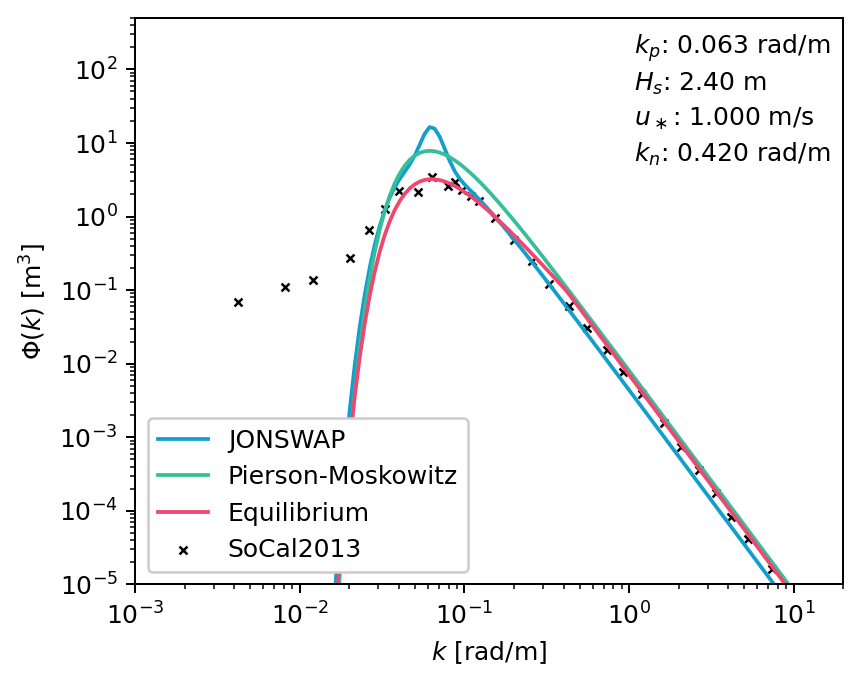

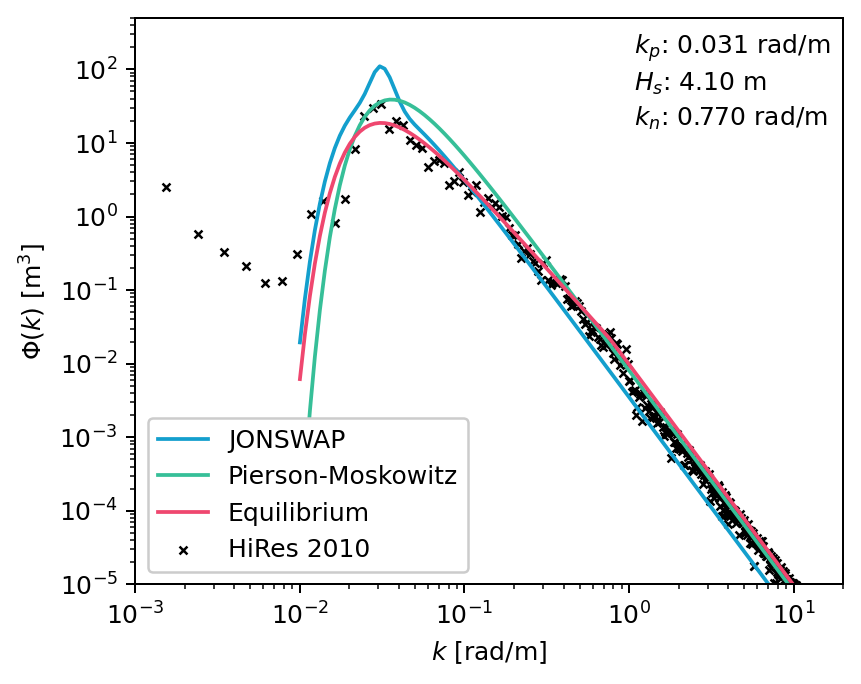

In [3]:
dataname = 'experimental_data/lenain.pkl'
datalabel = "SoCal2013"

print('Data from Lenain and Melville 2017')
one_dataset(dataname,datalabel)

dataname = 'experimental_data/pizzo.pkl'
datalabel = "HiRes 2010"
print('\nData from Sutherland and Melville 2013')
print('(obtained from Pizzo et al. 2019)')
one_dataset(dataname,datalabel)

## GOTEX 2010
Romero and Melville 2010

In [ ]:
eyes = [0, 1, 3, 7, 11] # cases to use (indeces)
datanames = ['experimental_data/romero_2010/romero_'+str(i)+'.pkl' for i in eyes]
ldata = [lidData.LidarData(datanames[i], 'r'+str(i), fetch=True) for i in range(len(datanames))]

eqs_specs = []
js_specs = []
js_rep_specs = []
pm_specs = []
for i in range(len(ldata)):
    ld = ldata[i]
    print('\n{:2}) kp = {:.3f},  Hs = {:.3f},  eta_sq = {:.3f}'.format(eyes[i]+1, ldata.kp, ld.Hs, (ld.Hs/4)**2))
    eqs_specs.append(equilibrium.EquilibriumSpec(ld.kp, ld.Hs, 100))

    X, U10 = ld.jonswap_inputs()
    js_specs.append(jonswap.JONSWAPSpec(X, U10))
    js_rep_specs.append(jonswap.JONSWAPSpec(ld.Xe, ld.U10e))

    U19 = ld.pm_inputs()
    pm_specs.append(piersonMoskowitz.PiersonMoskowitzSpec(U19))

    z0 = 19.5 / np.exp(U19 * 0.41 / ld.ustar)
    print('    z0: {:.1e}'.format(z0))
    print('    PM: U10 = {:.2f}'.format(ld.ustar / 0.41 * np.log(10/z0)))
    print('    JS (calculated): X = {:.0f}, U10 = {:.2f}'.format(X,U10))
    print('    JS (reported): X = {:.0f}, U10 = {:.2f}'.format(ld.Xe,ld.U10e))



 1) kp = 0.250,  Hs = 1.083,  eta_sq = 0.073
    solved for P = 0.055533 with 30 iterations
    z0: 3.9e-01
    PM: U10 = 5.90
    JS (calculated): X = 15761, U10 = 16.89
    JS (reported): X = 7442, U10 = 18.13

 2) kp = 0.177,  Hs = 1.524,  eta_sq = 0.145
    solved for P = 0.065190 with 31 iterations
    z0: 1.9e-01
    PM: U10 = 7.22
    JS (calculated): X = 22638, U10 = 19.83
    JS (reported): X = 12284, U10 = 18.12

 4) kp = 0.113,  Hs = 2.075,  eta_sq = 0.269
    solved for P = 0.061688 with 32 iterations
    z0: 8.6e-02
    PM: U10 = 8.63
    JS (calculated): X = 46848, U10 = 18.77
    JS (reported): X = 24215, U10 = 18.00

 8) kp = 0.079,  Hs = 2.712,  eta_sq = 0.460
    solved for P = 0.061136 with 32 iterations
    z0: 1.2e-02
    PM: U10 = 10.24
    JS (calculated): X = 81471, U10 = 18.60
    JS (reported): X = 64255, U10 = 14.84

12) kp = 0.039,  Hs = 3.915,  eta_sq = 0.958
    solved for P = 0.045042 with 34 iterations
    z0: 5.6e-03
    PM: U10 = 12.42
    JS (calcula

Text(0.02, 0.93, 'f)')

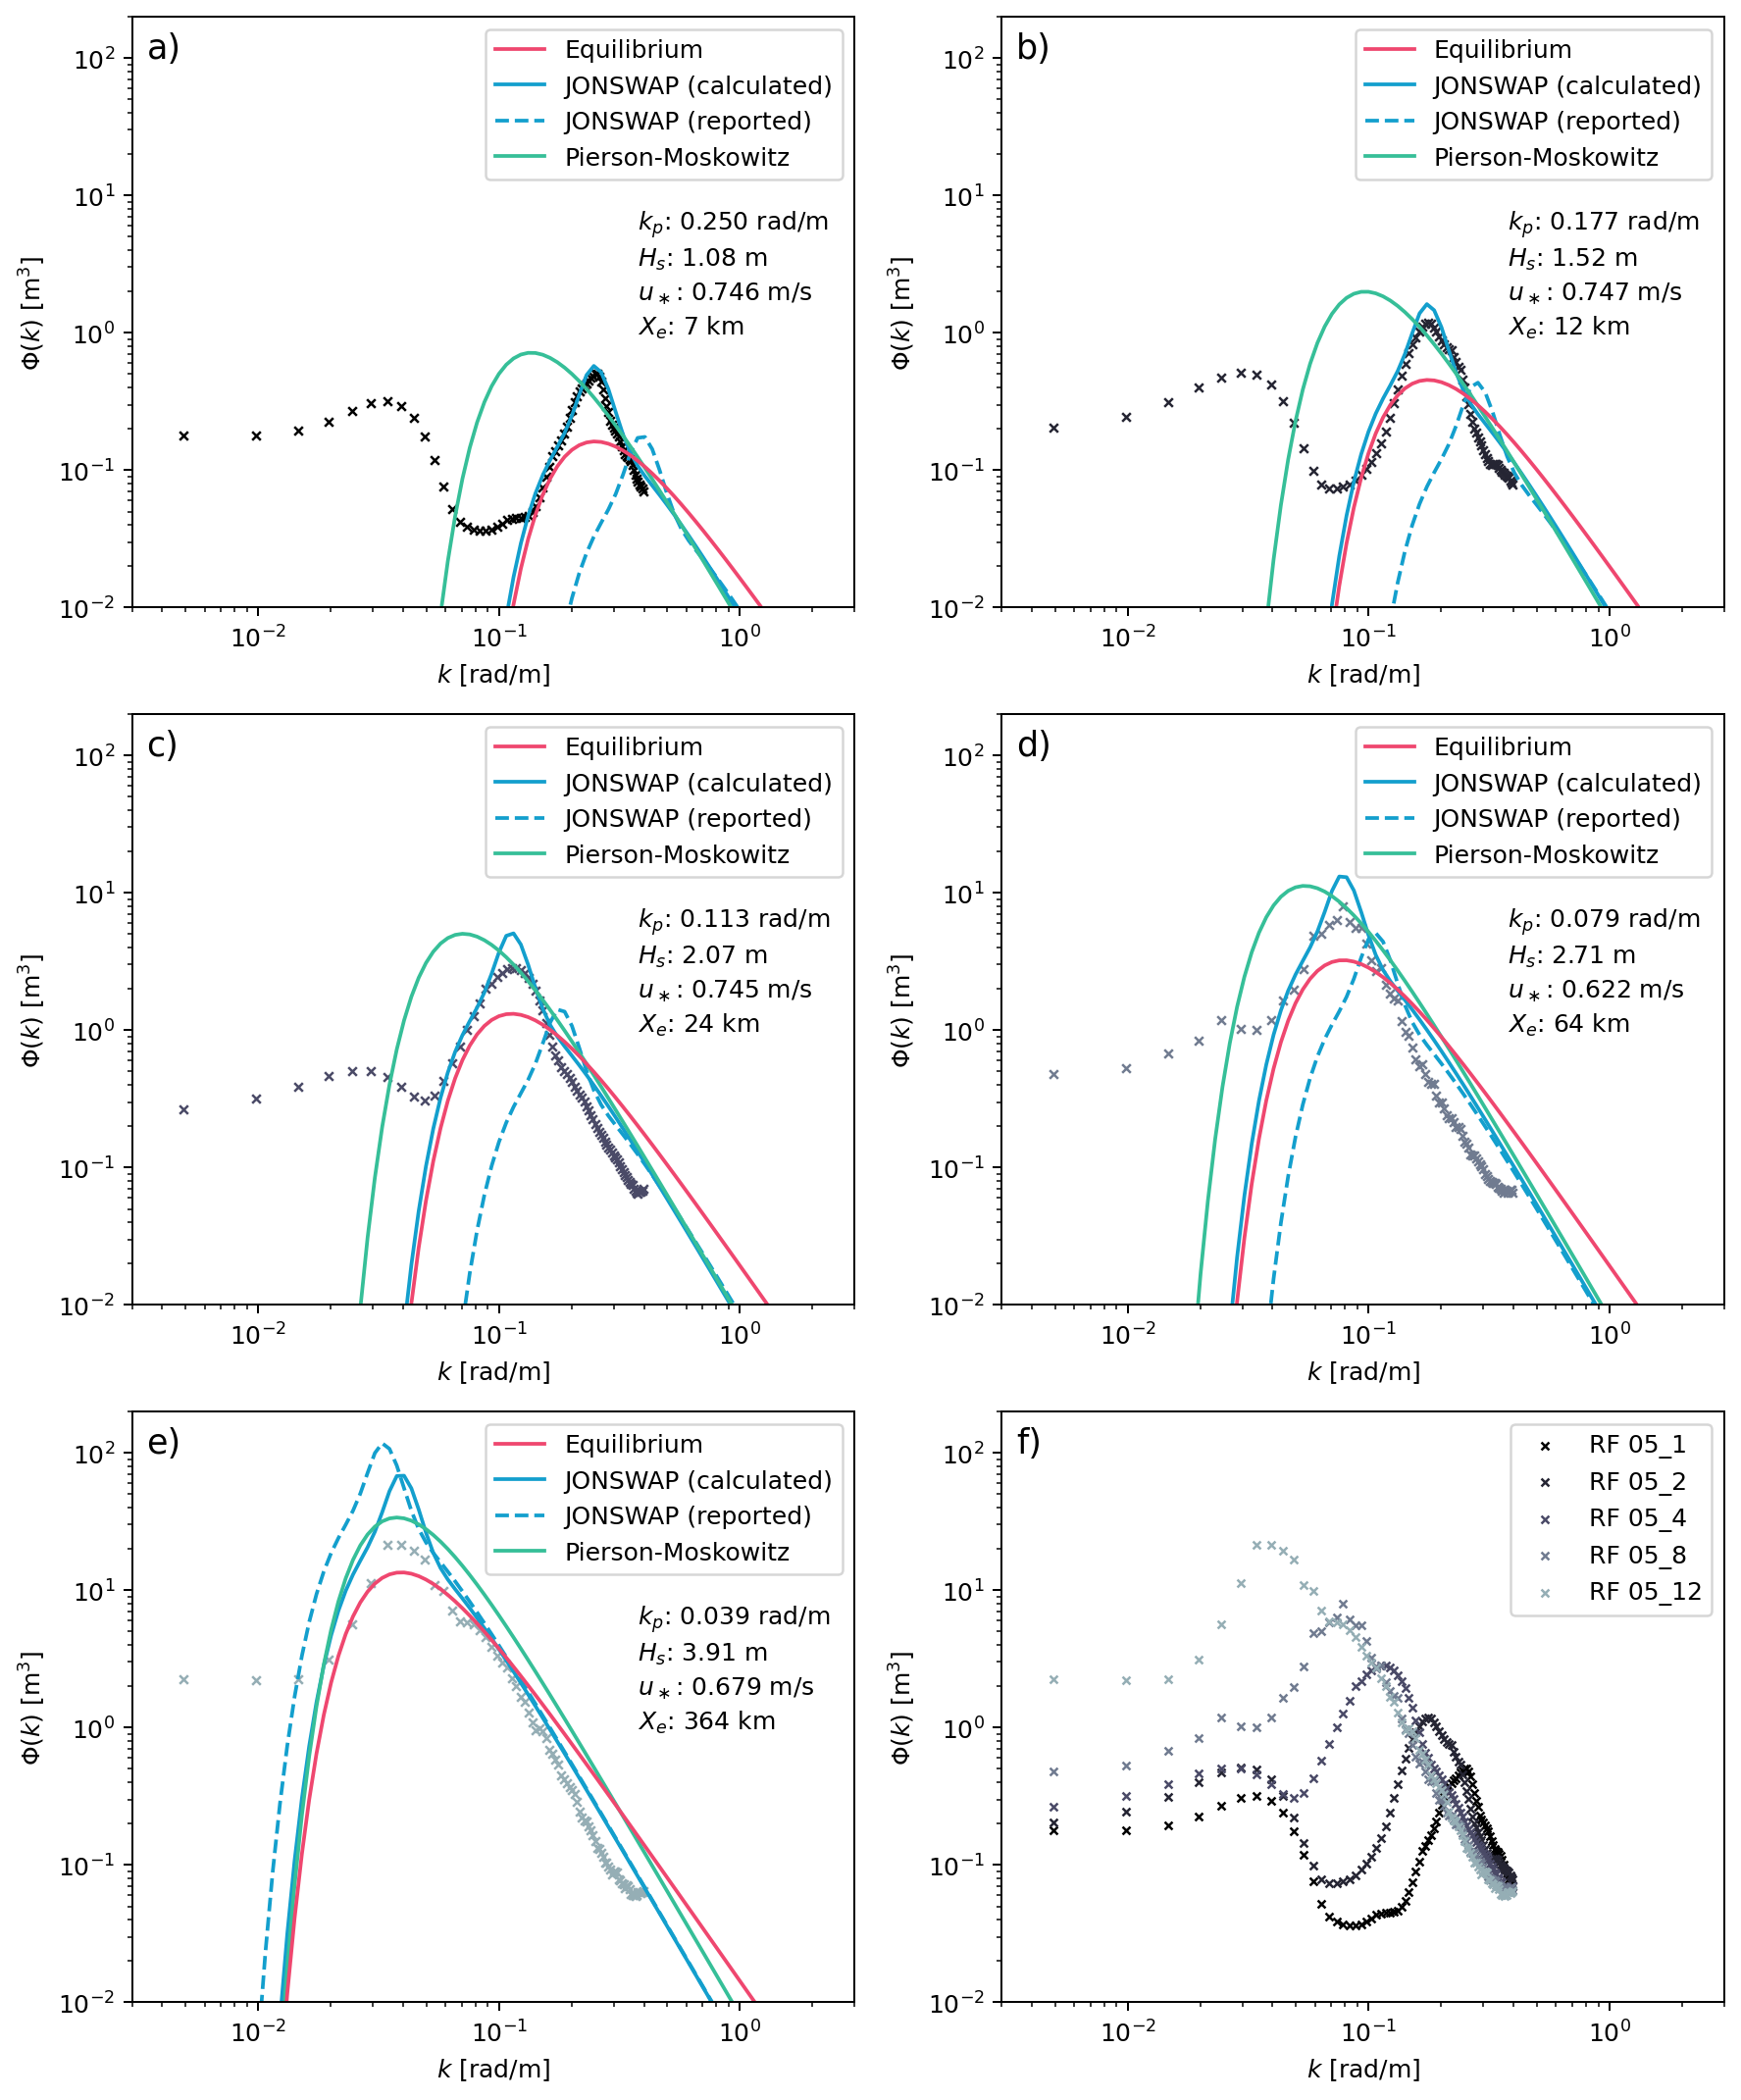

In [5]:
fig, axs = plt.subplots(3,2, facecolor='w', dpi=180.0, figsize=(10,12), 
                        tight_layout=True)

cmap = plt.get_cmap('bone')
norm = Normalize(vmin=0, vmax=len(datanames)+1)
colors = [cmap(norm(i)) for i in range(len(datanames))]

labels = ['RF 05_'+str(eye+1) for eye in eyes]
letters = ['a','b','c','d','e','f']

for i in range(len(datanames)):
    axi = int(i/2)
    axj = i%2

    label = labels[i]
    axs[axi,axj].scatter(ldata[i].data['k'], ldata[i].data['Phi'], 12, color=colors[i],
            marker='x', label=label, lw=1)
    axs[axi,axj].set_xscale('log')
    axs[axi,axj].set_yscale('log')
    axs[axi,axj].loglog(js_specs[i].k, js_specs[i].E_k(), color='#139FCD', label='JONSWAP (calculated)')
    axs[axi,axj].loglog(js_rep_specs[i].k, js_rep_specs[i].E_k(), color='#139FCD', ls='--', label='JONSWAP (reported)')
    axs[axi,axj].loglog(pm_specs[i].k, pm_specs[i].E_k(), color='#36BF98', label='Pierson-Moskowitz')
    axs[axi,axj].loglog(eqs_specs[i].k, eqs_specs[i].E_k(), color='#EF476F', label='Equilibrium')

    axs[axi,axj].set_xlabel(r'$k$ [rad/m]')
    axs[axi,axj].set_ylabel(r'$\Phi(k)$ [m$^3$]')

    # * reorder legend
    handles,axlabels = axs[axi,axj].get_legend_handles_labels()
    handles = [handles[3], handles[0], handles[1], handles[2]]
    axlabels = [axlabels[3], axlabels[0], axlabels[1], axlabels[2]]

    axs[axi,axj].set_ylim((1e-2,2e2))
    axs[axi,axj].set_xlim((3e-3,3e0))
    axs[axi,axj].legend(handles,axlabels)

    info1 = r'$k_p$: {:.3f} rad/m'.format(ldata[i].kp)
    info2 = r'$H_s$: {:.2f} m'.format(ldata[i].Hs)
    info3 = r'$u_\ast$: {:.3f} m/s'.format(ldata[i].ustar)
    info4 = r'$X_e$: {:.0f} km'.format(ldata[i].Xe / 1000)
    letter = letters[i]+')'
    axs[axi,axj].text(0.7, 0.64, info1, transform=axs[axi,axj].transAxes)
    axs[axi,axj].text(0.7, 0.578, info2, transform=axs[axi,axj].transAxes)
    axs[axi,axj].text(0.7, 0.52, info3, transform=axs[axi,axj].transAxes)
    axs[axi,axj].text(0.7, 0.462, info4, transform=axs[axi,axj].transAxes)
    axs[axi,axj].text(0.02, 0.93, letter, transform=axs[axi,axj].transAxes, fontsize=14)


    axs[2,1].scatter(ldata[i].data['k'], ldata[i].data['Phi'], 10, color=colors[i],
            marker='x', label=label, lw=1)
    axs[2,1].set_xscale('log')
    axs[2,1].set_yscale('log')


axs[2,1].set_ylim((1e-2,2e2))
axs[2,1].set_xlim((3e-3,3e0))
axs[2,1].legend()

axs[2,1].set_xlabel(r'$k$ [rad/m]')
axs[2,1].set_ylabel(r'$\Phi(k)$ [m$^3$]')
axs[2,1].text(0.02, 0.93, 'f)', transform=axs[2,1].transAxes, fontsize=14)

## ASIT TKE Experiment
Hogan et al. 2025

In [ ]:
def plot_hogan(dataname, datalabel):

    ldata = lidData.LidarData(dataname, datalabel, hogan=True)
    print('\n{:2}) kp: {:.3f},  Hs: {:.3f},  eta_sq: {:.3f}, wdir: {:.1f}'.format(eyes[i], ldata.kp, ldata.Hs, (ldata.Hs/4)**2, ldata.wdir))
    eqs_spec = equilibrium.EquilibriumSpec(ldata.kp, ldata.Hs, ldata.kn)

    X, U10 = ldata.jonswap_inputs()
    js_spec = jonswap.JONSWAPSpec(X, U10)

    U19 = ldata.pm_inputs()
    pm_spec = piersonMoskowitz.PiersonMoskowitzSpec(U19)

    z0 = 19.5 / np.exp(U19 * 0.41 / ldata.ustar)
    print('    z0: {:.1e}'.format(z0))
    print('    PM: U10 = {:.2f}'.format(ldata.ustar / 0.41 * np.log(10/z0)))
    print('    JS: X = {:.0f}, U10 = {:.2f}'.format(X,U10))
    print('    kn: {:.2f}'.format(ldata.kn))


    # * plot
    plt.figure(facecolor='w', dpi=200.0, figsize=(5,4), tight_layout=True)

    plt.scatter(ldata.data['k'], ldata.data['Phi'], 10, color='black',
                marker='x', label=datalabel, lw=1)

    plt.loglog(js_spec.k, js_spec.E_k(), color='#139FCD', label='JONSWAP')
    plt.loglog(pm_spec.k, pm_spec.E_k(), color='#36BF98', label='Pierson-Moskowitz')
    plt.loglog(eqs_spec.k, eqs_spec.E_k(), color='#EF476F', label='Equilibrium')

    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel(r'$k$ [rad/m]')
    plt.ylabel(r'$\Phi(k)$ [m$^3$]')

    plt.ylim((1e-5,2e2))
    plt.xlim((3e-3,3e1))
    plt.legend(loc='lower left', framealpha=1)

    info1 = r'$k_p$: {:.3f} rad/m'.format(ldata.kp)
    info2 = r'$H_s$: {:.2f} m'.format(ldata.Hs)
    info3 = r'$u_\ast$: {:.3f} m/s'.format(ldata.ustar)
    info4 = r'$k_n$: {:.2f} rad/m'.format(ldata.kn)
    info5 = r'$\theta_w$: {:.1f}˚'.format(ldata.wdir)

    ax = plt.gca()
    ax.text(0.71, 0.94, info1, transform=ax.transAxes)
    ax.text(0.71, 0.875, info2, transform=ax.transAxes)
    ax.text(0.71, 0.82, info3, transform=ax.transAxes)
    ax.text(0.71, 0.76, info4, transform=ax.transAxes)
    ax.text(0.71, 0.70, info5, transform=ax.transAxes)


164) kp: 0.054,  Hs: 3.545,  eta_sq: 0.785, wdir: 11.0
    solved for P = 0.059756 with 33 iterations
    z0: 2.0e-03
    PM: U10 = 11.93
    JS: X = 149131, U10 = 17.97
    kn: 0.50

50) kp: 0.072,  Hs: 1.456,  eta_sq: 0.133, wdir: 221.4
    solved for P = 0.015689 with 32 iterations
    z0: 2.8e-05
    PM: U10 = 7.84
    JS: X = 360092, U10 = 4.75
    kn: 1.20


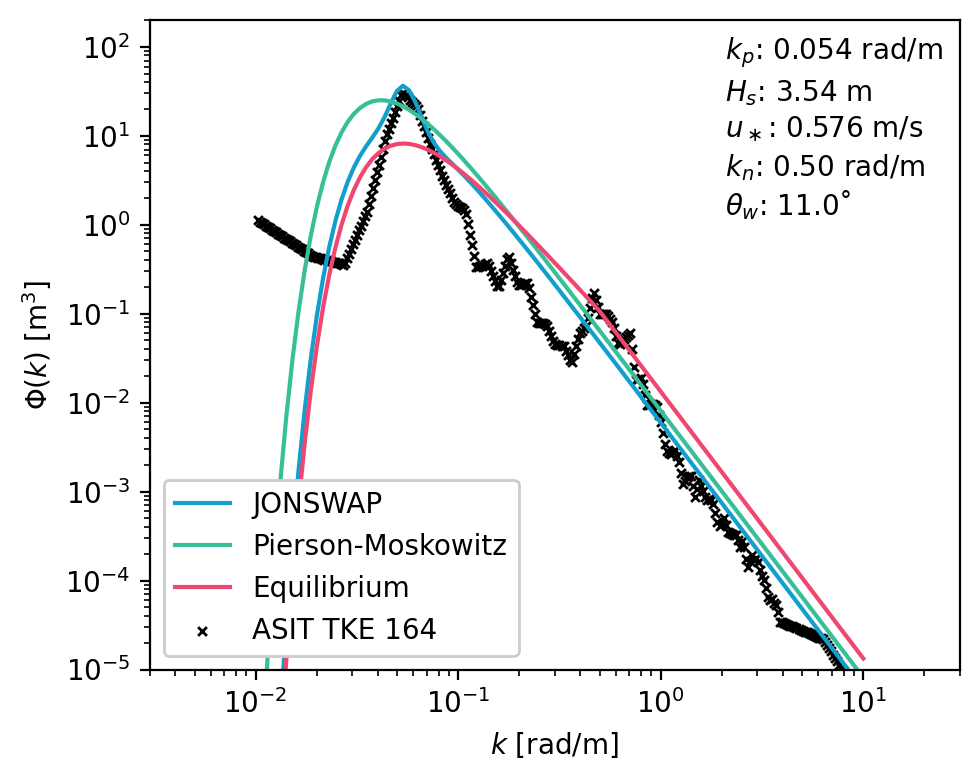

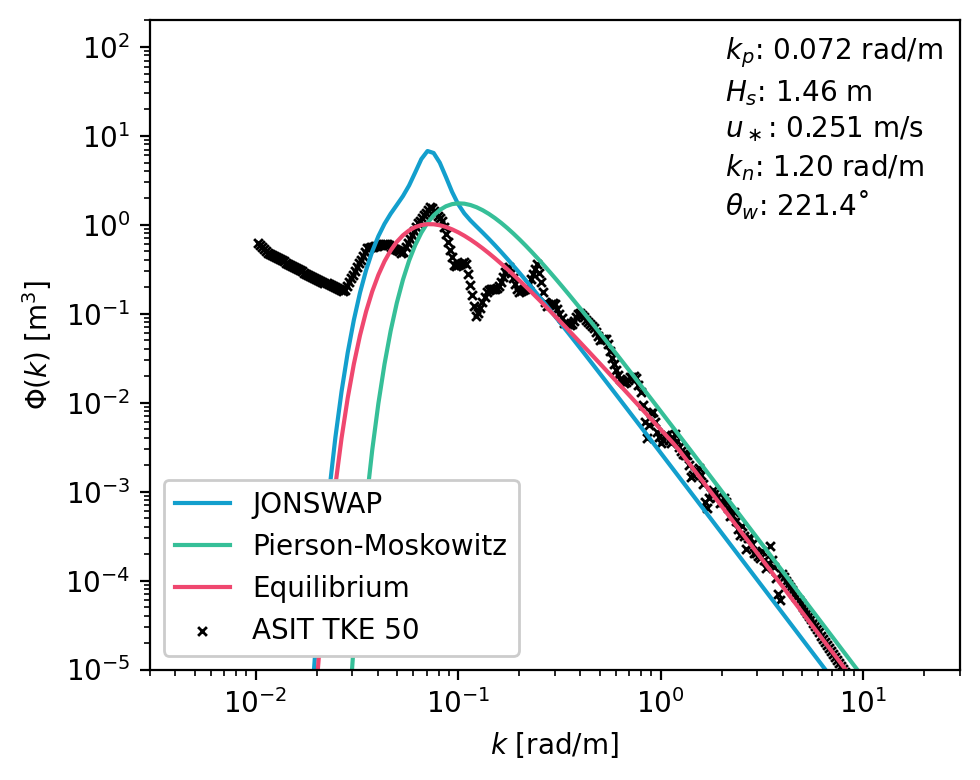

In [12]:
eyes = [164, 50]
figname = 'final2'
datanames = ['experimental_data/hogan_2025/hogan_'+str(i)+'.pkl' for i in eyes]
datalabels = ['ASIT TKE {}'.format(eye) for eye in eyes]

for i in range(len(eyes)):
    plot_hogan(datanames[i], datalabels[i])